In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("../data/20220623_test_1.csv")
df

,0,2653,2449,2474,2439,-2541,-2544,-2393,-2613
0,1,2653,2450,2473,2438,-2539,-2541,-2395,-2617
1,2,2653,2449,2473,2439,-2536,-2546,-2394,-2612
2,3,2651,2445,2476,2439,-2541,-2539,-2394,-2615
3,4,2648,2447,2478,2437,-2537,-2548,-2395,-2615
4,5,2646,2444,2474,2436,-2539,-2538,-2395,-2578
...,...,...,...,...,...,...,...,...,...
494,495,2647,2444,2478,2439,-2538,-2543,-2401,-2621
495,496,2652,2445,2478,2441,-2537,-2540,-2396,-2613
496,497,2649,2445,2473,2442,-2500,-2542,-2397,-2619
497,498,2653,2447,2474,2442,-2539,-2543,-2397,-2615


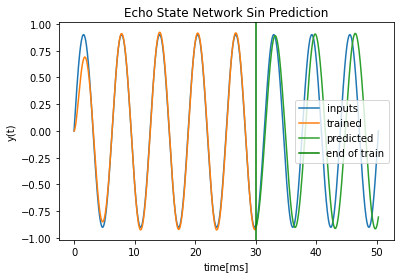

In [7]:
import numpy as np
from input_generator import InputGenerator
from reservoir_network import ReservoirNetWork
import matplotlib.pyplot as plt

T = np.pi * 16 
RATIO_TRAIN = 0.6
dt = np.pi * 0.01
AMPLITUDE = 0.9
LEAK_RATE=0.02
NUM_INPUT_NODES = 1
NUM_RESERVOIR_NODES = 150
NUM_OUTPUT_NODES = 1
NUM_TIME_STEPS = int(T/dt)

# example of activator
def ReLU(x):
    return np.maximum(0, x)

def main():
    i_gen = InputGenerator(0, T, NUM_TIME_STEPS)
    data = i_gen.generate_sin(amplitude=AMPLITUDE)
    num_train = int(len(data) * RATIO_TRAIN)
    train_data = data[:num_train]

    model = ReservoirNetWork(inputs=train_data,
        num_input_nodes=NUM_INPUT_NODES, 
        num_reservoir_nodes=NUM_RESERVOIR_NODES, 
        num_output_nodes=NUM_OUTPUT_NODES, 
        leak_rate=LEAK_RATE)

    model.train() # 訓練
    train_result = model.get_train_result() # 訓練の結果を取得

    num_predict = int(len(data[num_train:]))
    predict_result = model.predict(num_predict)

    t = np.linspace(0, T, NUM_TIME_STEPS)
    ## plot
    plt.plot(t, data, label="inputs")
    plt.plot(t[:num_train], train_result, label="trained")
    plt.plot(t[num_train:], predict_result, label="predicted")
    plt.axvline(x=int(T * RATIO_TRAIN), label="end of train", color="green") # border of train and prediction
    plt.legend()
    plt.title("Echo State Network Sin Prediction")
    plt.xlabel("time[ms]")
    plt.ylabel("y(t)")
    plt.show()

if __name__=="__main__":
    main()